*This Notebook was created by Antoine Palisson*

In [1]:
pip install missingno

     |████████████████████████████████| 17.6 MB 13.4 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.1 requires flatbuffers<2,>=1.12, but you have flatbuffers 2.0 which is incompatible.
You should consider upgrading via the '/Users/skyemalfoy/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split

# Data Exploration

In [2]:
from sklearn.datasets import fetch_openml
data = fetch_openml('Adult-Census-Income', version=1, as_frame=True)
df = pd.concat([data['data'], data['target']], axis=1)
df['income'] = df['income'].map({'=50K':'>=50k','50K':'<50k'})
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90.0,None,77053.0,HS-grad,9.0,Widowed,None,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,>=50k
1,82.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,>=50k
2,66.0,None,186061.0,Some-college,10.0,Widowed,None,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,>=50k
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,>=50k
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,>=50k


The `income` target variable is the target of the adult dataset.

**<font color='blue'>1.a. What is the task of the dataset ? Is it a classification and a regression ?<br>1.b. What is the type of each feature ? Are they Nominal ? Ordinal ? Cyclical ? Numerical ?**

In [3]:
'''
1.a This is a classification task.
1.b 
age: Numerical;
workclass: Nominal;
fnlwgt: Numerical;
education: Ordinal;
education.num: Numerical;
marital.status: Nominal;
occupation: Nominal;
relationship: Nominal;
race: Nominal;
sex: Nominal;
capital.gain: Numerical;
capital.loss: Numerical;
hours.per.week: Numerical;
native.country: Norminal.
'''

'\n1.a This is a classification task.\n1.b \nage: Numerical;\nworkclass: Nominal;\nfnlwgt: Numerical;\neducation: Ordinal;\neducation.num: Numerical;\nmarital.status: Nominal;\noccupation: Nominal;\nrelationship: Nominal;\nrace: Nominal;\nsex: Nominal;\ncapital.gain: Numerical;\ncapital.loss: Numerical;\nhours.per.week: Numerical;\nnative.country: Norminal.\n'

**<font color='blue'>2. Is there any missing values in the dataset ?**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education.num   32561 non-null  float64
 5   marital.status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital.gain    32561 non-null  float64
 11  capital.loss    32561 non-null  float64
 12  hours.per.week  32561 non-null  float64
 13  native.country  31978 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
#Study the relationship of missing value columns.
# print(df[df['workclass'].isnull()])
df_selected = df[df['workclass'].isnull()][['workclass', 'occupation']]
df_selected

,workclass,occupation
0,None,None
2,None,None
14,None,None
24,None,None
44,None,None
...,...,...
32533,None,None
32534,None,None
32541,None,None
32543,None,None


So we can see there are 1836, 1843, 583 missing values for features 'workclass', 'occupation' and 'native.country' respectively. <br/><br/>
Also, while column workclass has missing values, column occupation has missing values also - which means these two columns are related.

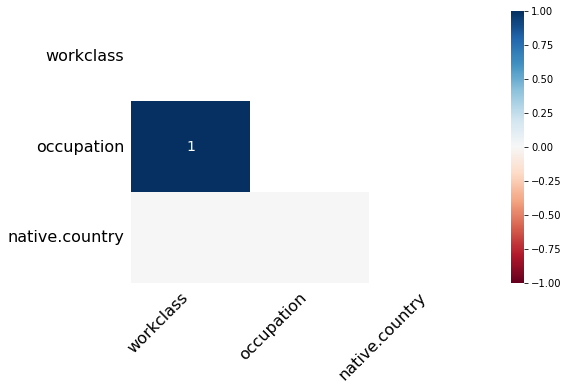

In [11]:
#Find out the correlation between "workclass" and 'occupation'
msno.heatmap(df, figsize=(8,5))
plt.show()

**<font color='blue'>3. Is there any duplicates in the dataset ?<br> If so, delete them.**

In [6]:
df.duplicated().sum()
df[df.duplicated()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25.0,Private,308144.0,Bachelors,13.0,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,40.0,Mexico,>=50k
8645,90.0,Private,52386.0,Some-college,10.0,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0.0,0.0,35.0,United-States,>=50k
12202,21.0,Private,250051.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,10.0,United-States,>=50k
14346,20.0,Private,107658.0,Some-college,10.0,Never-married,Tech-support,Not-in-family,White,Female,0.0,0.0,10.0,United-States,>=50k
15603,25.0,Private,195994.0,1st-4th,2.0,Never-married,Priv-house-serv,Not-in-family,White,Female,0.0,0.0,40.0,Guatemala,>=50k
17344,21.0,Private,243368.0,Preschool,1.0,Never-married,Farming-fishing,Not-in-family,White,Male,0.0,0.0,50.0,Mexico,>=50k
19067,46.0,Private,173243.0,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,>=50k
20388,30.0,Private,144593.0,HS-grad,9.0,Never-married,Other-service,Not-in-family,Black,Male,0.0,0.0,40.0,None,>=50k
20507,19.0,Private,97261.0,HS-grad,9.0,Never-married,Farming-fishing,Not-in-family,White,Male,0.0,0.0,40.0,United-States,>=50k
22783,19.0,Private,138153.0,Some-college,10.0,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,10.0,United-States,>=50k


In [7]:

#So, delete the dublicates.
df = df.drop_duplicates()
df[df.duplicated()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


**<font color='blue'>4. Is there any outliers ?<br>**

### 4.1 Numerical Data

In [8]:
#Calculate z-score
num_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
mean = np.mean(df[num_cols])
# print(mean)
std = np.std(df[num_cols])
# print(std)
z_score = abs(df[num_cols] - mean) / std
z_score

/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3.770003,1.067955,0.420679,0.145975,10.589625,0.035664
1,3.183397,0.539159,0.420679,0.145975,10.589625,1.817516
2,2.010185,0.035241,0.031815,0.145975,10.589625,0.035664
3,1.130276,0.468210,2.364998,0.145975,9.458380,0.035664
4,0.177041,0.709415,0.031815,0.145975,9.458380,0.035664
...,...,...,...,...,...,...
32556,1.216148,1.140366,0.031815,0.145975,0.216743,0.035664
32557,0.849519,0.639678,0.745913,0.145975,0.216743,0.197650
32558,0.103716,0.335436,0.420679,0.145975,0.216743,0.035664
32559,1.423579,0.358779,0.420679,0.145975,0.216743,0.035664


In [16]:
#z_score analysis
#>3
print('z_score>3: \n{0}'.format((z_score>3).sum()))
#>4
print('z_score>4: \n{0}'.format((z_score>4).sum()))

z_score>3: 
age                120
fnlwgt             346
education.num      216
capital.gain       215
capital.loss      1470
hours.per.week     440
dtype: int64
z_score>4: 
age                  0
fnlwgt             122
education.num        0
capital.gain       166
capital.loss      1121
hours.per.week     139
dtype: int64


<AxesSubplot:>

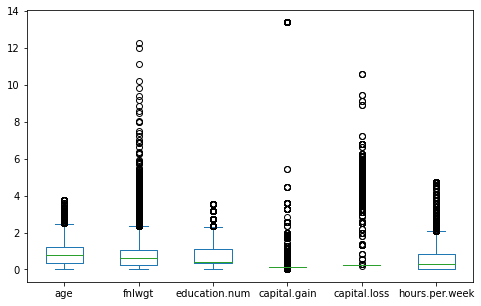

In [10]:
z_score.plot.box(figsize=(8,5))

## 4.2 Categorical Data

In [19]:
cat_col = df.drop(num_cols, axis=1).columns
print(cat_col)

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')


In [26]:
for cols in cat_col:
    print("Value counts of {0}:\n{1}".format(cols, df[cols].value_counts(normalize=True)),end='\n\n')

Value counts of workclass:
Private             0.738510
Self-emp-not-inc    0.082733
Local-gov           0.068174
State-gov           0.042279
Self-emp-inc        0.036351
Federal-gov         0.031269
Without-pay         0.000456
Never-worked        0.000228
Name: workclass, dtype: float64

Value counts of education:
HS-grad         0.322525
Some-college    0.223807
Bachelors       0.164520
Masters         0.052924
Assoc-voc       0.042475
11th            0.036113
Assoc-acdm      0.032793
10th            0.028675
7th-8th         0.019824
Prof-school     0.017703
9th             0.015797
12th            0.013308
Doctorate       0.012693
5th-6th         0.010204
1st-4th         0.005102
Preschool       0.001537
Name: education, dtype: float64

Value counts of marital.status:
Married-civ-spouse       0.460092
Never-married            0.327842
Divorced                 0.136491
Separated                0.031503
Widowed                  0.030519
Married-spouse-absent    0.012847
Married-AF-s

We can find outliers for all feature columns except sex. 

**<font color='blue'>5.a. Analyze the ditribution of the label using graphs and statistics.<br> Is the dataset balanced ?**

       Count  percentage
>=50k  24698        0.76
<50k    7839        0.24


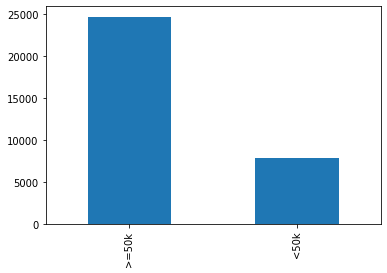

In [36]:
count_label = df.iloc[:, -1].value_counts()
count_label.plot.bar()
count_label = count_label.to_frame(name='Count')
count_label['percentage'] = round(df['income'].value_counts(normalize=True), 2)
print(count_label)
plt.show()

**<font color='blue'>5.b. Analyze the features one by one using graphs, statistics ...<br>**

### 1. Numerical features

In [37]:
df[num_cols].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

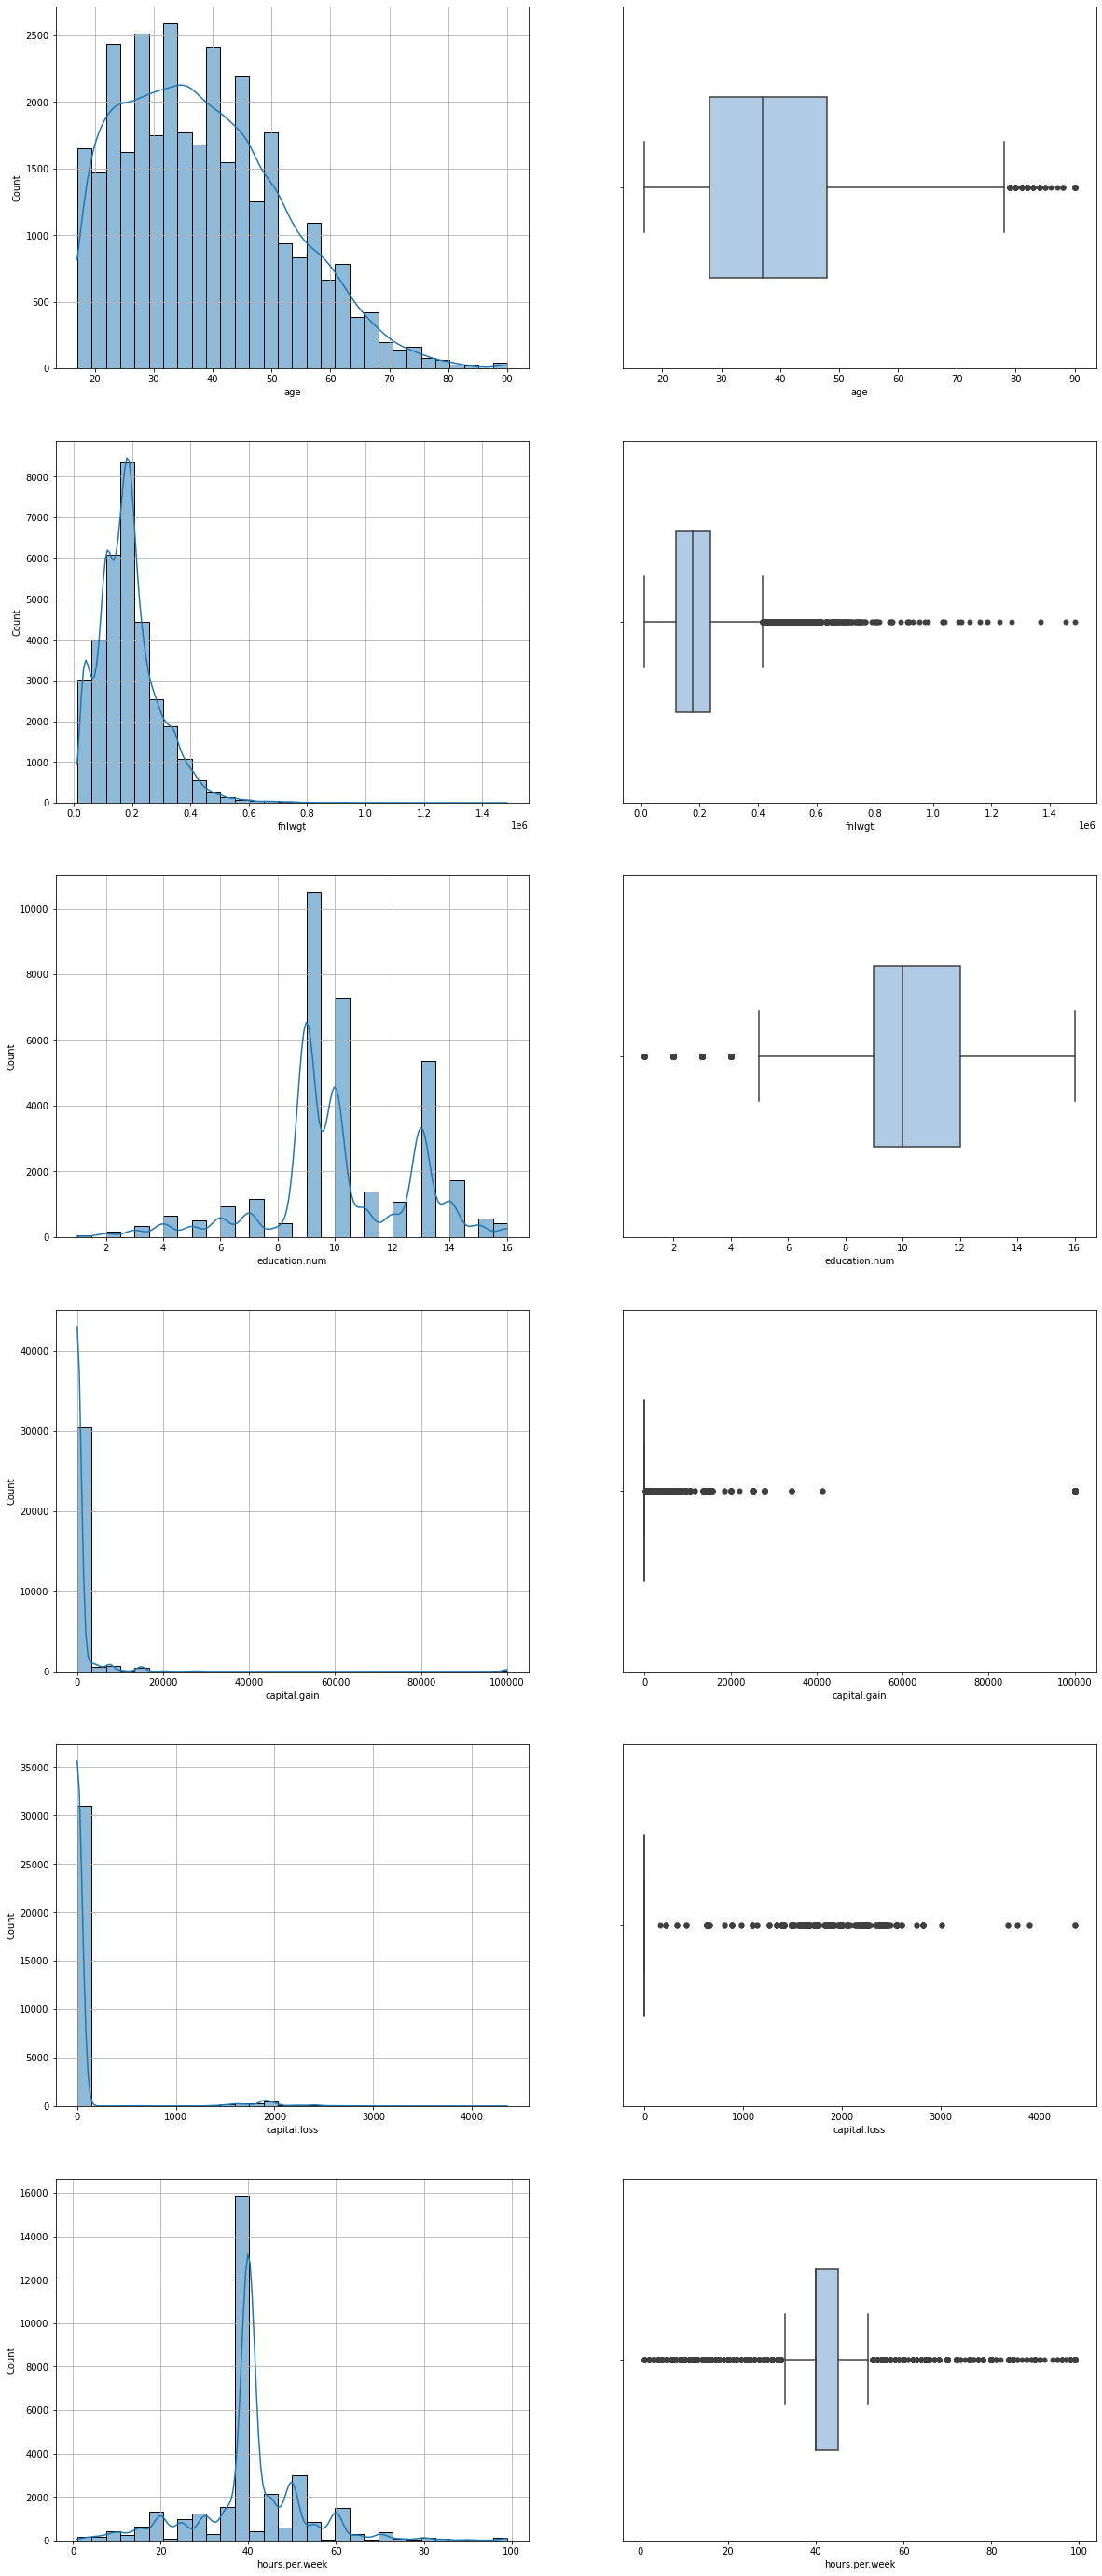

In [46]:
fig, axs = plt.subplots(len(num_cols), 2, figsize=(20, 50))

for col,ax in zip(num_cols, axs):
    sns.histplot(df[col],
               bins=30,
               kde=True,
               ax=ax[0])
    ax[0].grid('on')
    sns.boxplot(df[col], 
                flierprops={"marker": "o"},
                boxprops={"facecolor": (.4, .6, .8, .5)}, 
                width=0.5, 
                ax=ax[1])

We can find out that most values of capital gain and loss are 0. And there are also a big ratio of data with the values of 40 for column hours.per.week.

Ratio of 0 for capital gain and loss; and 40 for column hours.per.week.

In [63]:
df['hours.per.week'].value_counts(normalize=True).values[0] * 100

0.46728340043642624

In [66]:
for col in ['capital.gain', 'capital.loss', 'hours.per.week']:
    print('There are {0}% of data are 0/40 for {1}'.format(round(df[col].value_counts(normalize=True).values[0] * 100, 2), col))

There are 91.66% of data are 0/40 for capital.gain
There are 95.33% of data are 0/40 for capital.loss
There are 46.73% of data are 0/40 for hours.per.week


### 2. Categorical features

/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

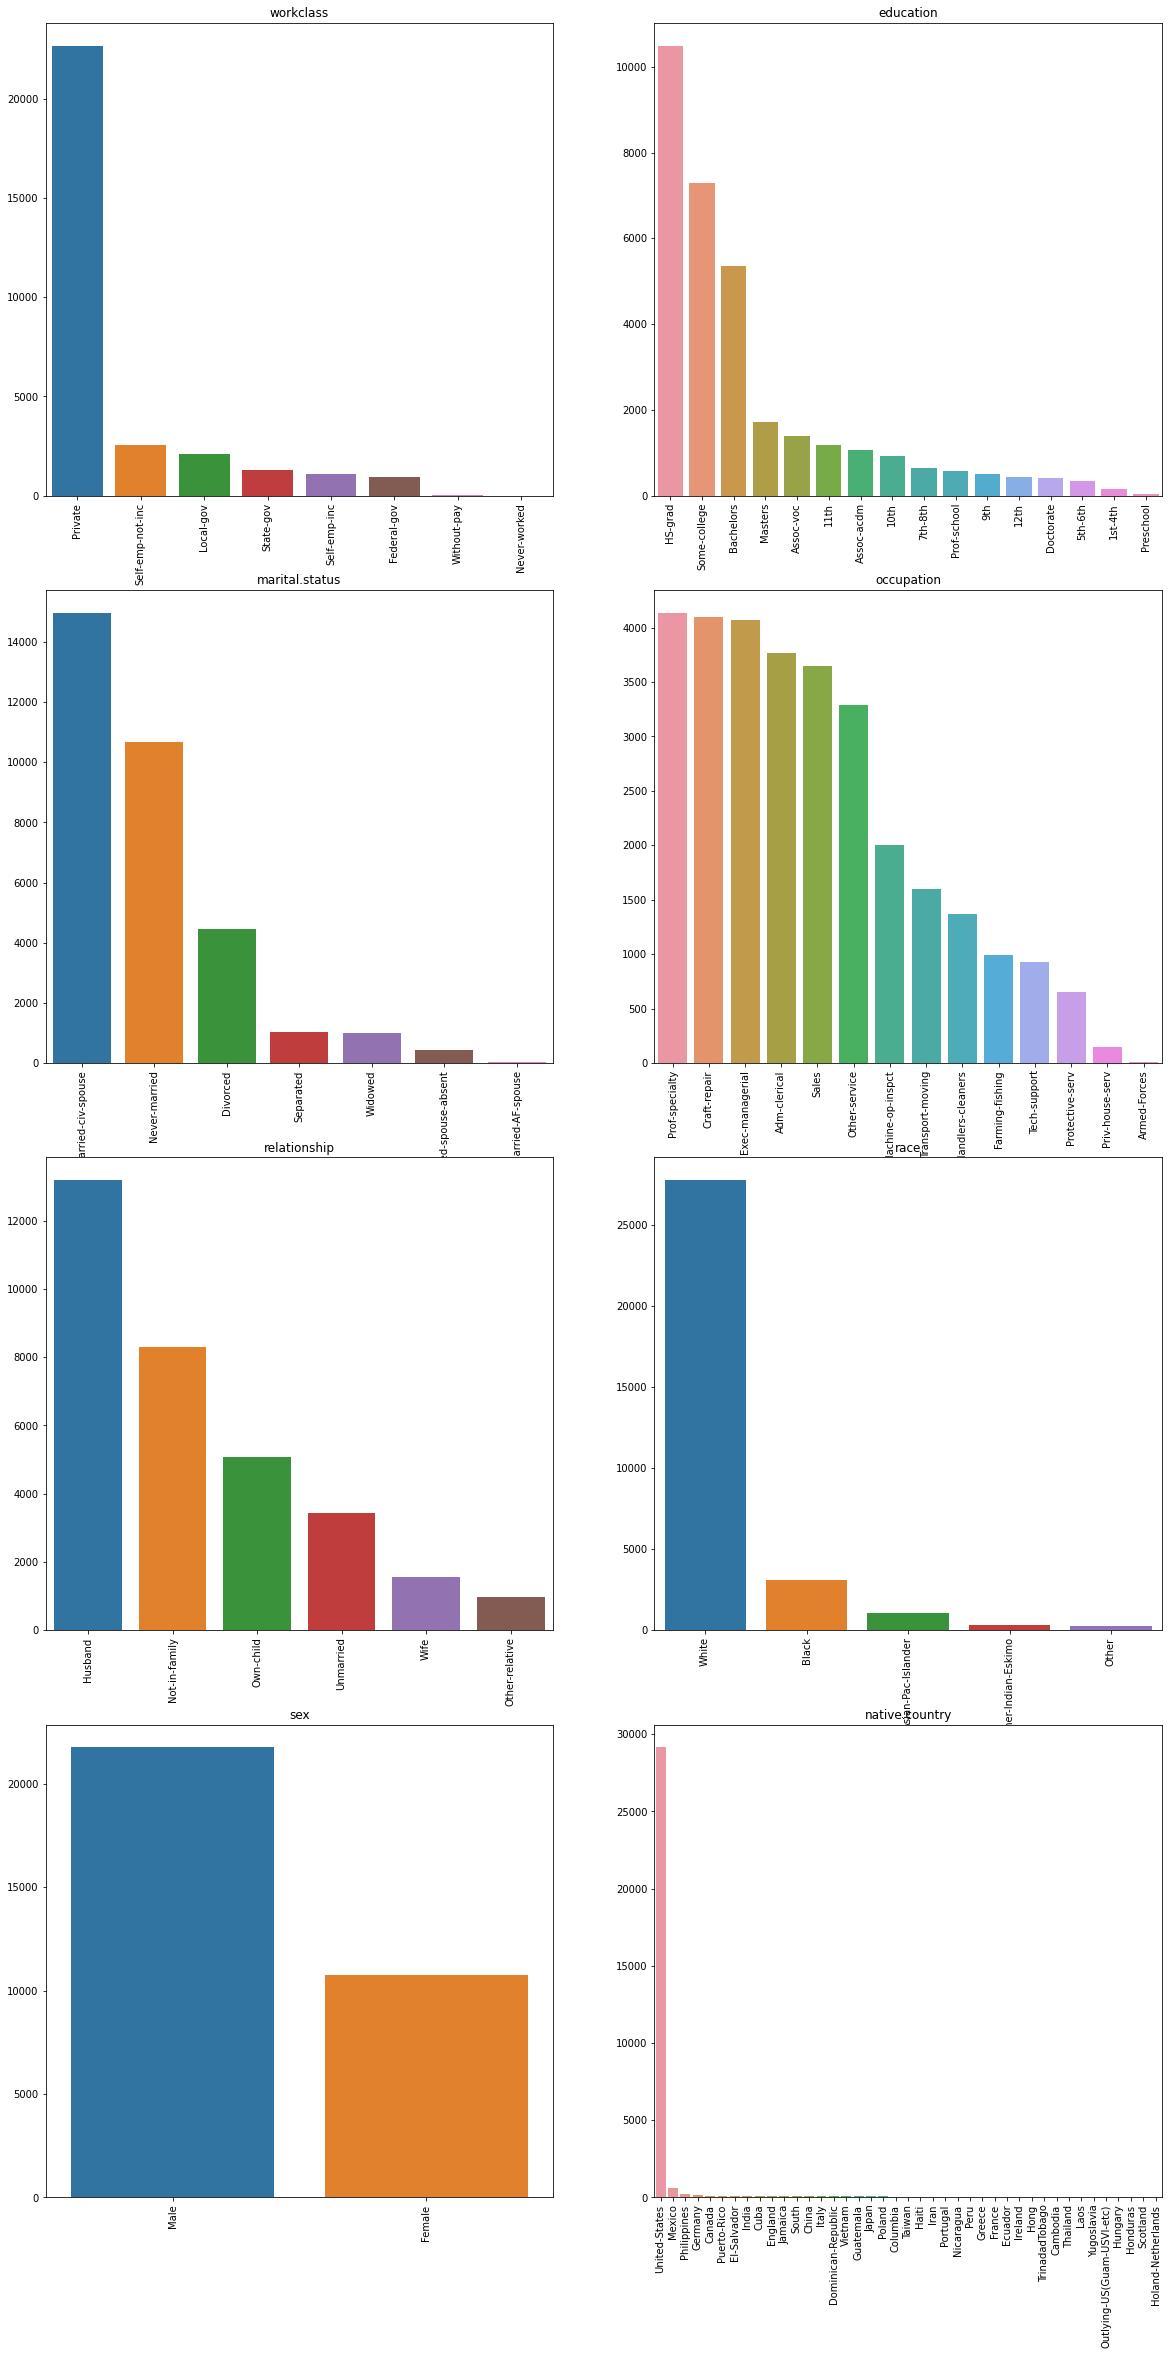

In [85]:
fig, axs = plt.subplots(4, 2 , figsize=(20,40))

for col,ax in zip(cat_col, np.ravel(axs)):
    vc_cat = df[col].value_counts()
    sns.barplot(vc_cat.index, vc_cat.values, ax=ax)
    ax.tick_params(axis='x', rotation=90)
    ax.set_title(col, fontsize=12)

**<font color='blue'>6.a. Analyze the relationships between the features using graphs, correlation ...<br>**

**<font color='blue'>6.b. Analyze the feature-label relationships using graphs, correlation ...<br>**

# Data Preprocessing

**<font color='blue'>1.a. Split the dataset into the features (X) and the label (y).**

In [87]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

**<font color='blue'>1.b. Split the dataset into a training and a testing set.**

*Tips: There is no need for a validation set in this exercise because you will use the cross validation.<br>You should stratify when the dataset is imbalanced.*

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

In [93]:
print(len(df))
print(len(X_train))

32537
26029


**<font color='blue'>2. Handle the missing values.**

In [ ]:
def nan_imputer(df):
    df['workclass'] = df['workclass'].fillna('No workclass')
    df['occupation'] = df['workclass'].fillna('No occupation')
    df['native.country'] = df['native.country'].fillna('Other')
    return df

**<font color='blue'>3. Handle the outliers**

In [ ]:
def outlier_imputer(df):
    df['workclass'] = df['workclass'].replace({
        'Without-pay': "No-work",
        'Never-worked': 'No-work'
    })
    df['education'] = df['education'].replace({
        '1st-4th':'<6th',
        'Preschool': '<6th'
    })
    df['marital.status'] = df['marital.status'].replace({
        'Married-AF-spouse': "Married-civ-spouse"
    })
    df['occupation'] = df['occupation'].replace({
        'Priv-house-serv': 'Other-service',
        'Armed-Forces': 'Other-service'
    })
    df['race'] = df['race'].replace({
        'Amer-Indian-Eskimo': 'Other'
    })
    df['native.country'].loc[df['native.country'] not in ['United-States', 'Mexico']] = 'Other'

**<font color='blue'>4. Preprocess the categorical features using the correct method.**

**<font color='blue'>5. Preprocess the numerical features using the correct method.**


**<font color='blue'> Using Pipeline to preprocess numerical and categorical features**


# Model Selection

The Logistic Regression model is a supervised learning algorithm used for binary classification problems where the target variable can take only two values.

You can find the `LogisticRegression` model on the sklearn library, [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Some of the most important hyperparameters include:

* **`penalty`**: *This parameter controls the type of regularization used in the model. The two options are "l1" and "l2". L1 regularization adds a penalty proportional to the absolute value of the coefficients, while L2 regularization adds a penalty proportional to the square of the coefficients. L1 regularization can be used to perform feature selection by setting some coefficients to zero, while L2 regularization tends to lead to smaller and more evenly distributed coefficients. Generally, L2 regularization is more commonly used and performs well in most situations.*
* **`C`**: *It is the inverse of the regularization strength, with smaller values of C indicating stronger regularization. A higher value of C allows the model to fit the training data more closely, while a lower value of C leads to more regularization and a simpler model. The optimal value of C depends on the particular dataset and the degree of complexity of the model that is required. A larger value of C could lead to overfitting while a smaller value of C could lead to underfitting.*
* **`solver`**: *This parameter specifies the algorithm used to optimize the model. Different solvers have different tradeoffs between speed and accuracy, and the optimal choice depends on the size of the dataset and the complexity of the model. The "liblinear" solver is a good choice for small datasets, while the "lbfgs" and "newton-cg" solvers are better suited for larger datasets. The "sag" and "saga" solvers are especially well-suited for large datasets with many features.*
* **`max_iter`**: *This parameter sets the maximum number of iterations for the solver to converge. If the solver has not converged after the maximum number of iterations, it will stop and return the best solution found so far. In general, larger datasets require more iterations to converge, so this parameter should be set appropriately.*

**<font color='blue'>1.a. Train a LogisticRegression model on the training set.**

The `LogisticRegression` class in sklearn has many attributes.<br>Here are some of the most important ones:

*  **`coef_`**: *This attribute returns an array of shape (1, n_features) or (n_classes, n_features) containing the estimated coefficients of the logistic regression model. For binary classification problems, this will be a 1D array of coefficients. For multi-class problems, there will be a separate row of coefficients for each class.*
*  **`intercept_`**: *This attribute returns an array of shape (1,) or (n_classes,) containing the estimated intercepts (or biases) of the logistic regression model. For binary classification problems, this will be a scalar value. For multi-class problems, there will be a separate intercept for each class.*

**<font color='blue'>1.b. Use the `.coef_` attributes to get the coefficient for each feature of the logistic regression.<br> Which feature seems to be the most important for the task ?**

The `LogisticRegression` class in sklearn has many methods.<br>Here are some of the most important ones:

* **`fit()`**: fits the logistic regression model to the training data X and labels y
* **`predict()`**: predicts the class labels for new data X.
* **`predict_proba()`**: predicts the probabilities of the class labels for new data X.
* **`score()`**: computes the mean accuracy of the logistic regression model on the given test data X and labels y

**<font color='blue'>1.c. Get the accuracy using the `.score()` function on the training set.**

**<font color='blue'>1.d. Predict the label of the training set using the `.predict()` method.**

Sklearn has many classification metrics including:

*   Accuracy - [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
*   Precision - [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
*   Recall - [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
*   f1-score - [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

**<font color='blue'>1.e. Using the prediction made at the previous question, compute the accuracy, the precision, the recall and the f1-score on the training set.**

**<font color='blue'>2.a. Merge the preprocessing steps and the model using the `Pipeline` and the `ColumnTransformer` classes from sklearn.**

*Tips: Refer to the previous Notebook for the Pipeline and ColumnTransformer  instructions.*

**<font color='blue'>2.b. Do a cross validation method with 5 folds with the `cross_val_score` function from sklearn on the LogisticRegression using a f1-score.**

*Tips: Refer to the previous Notebook for the cross-validation instructions.*

The `LearningCurveDisplay` class from the `sklearn.metrics` module is a tool for visualizing the learning curve generated by the `learning_curve` function or by its `.from_estimator()` method. You can find it [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LearningCurveDisplay.html#sklearn.model_selection.LearningCurveDisplay.from_estimator).

The simplest way to use the `LearningCurveDisplay` class is to use its `from_estimator()` method. It allows you to generate a learning curve plot directly from an estimator, without having to use the `learning_curve` function directly. It also use a cross-validation method to compute the score.

Here are the parameters of the `from_estimator()` method:

* **`estimator`**: *The machine learning model to use.*
* **`X`**: *The features of the training data.*
* **`y`**: *The label of the training data.*
* **`cv`**: *The cross-validation strategy to use. If cv is an integer value, it specifies the number of folds to use in k-fold cross-validation. If cv is a cross-validation generator, it specifies a custom cross-validation strategy to use.*
* **`train_sizes`**: *An array of training set sizes to use for the learning curve. It specifies the number of training data to use to compute the scores. By default, it will take 10%, 32.5%, 55%, 77.5% and 100%.*
* **`scoring`**: *The metric used to compute the learning curves.*
* **`score_type`**: *The type of score to plot. It can be “test” to display the testing score curve, “train” to display the training score or “both” to display both training and testing scores.*
* **`shuffle`**: *If set to True, it shuffles the data before sampling the instances with the train_sizes steps.*

```
model = ...
disp = LearningCurveDisplay.from_estimator(model, 
                                           X, 
                                           y,
                                           cv, ...)
disp.plot()
plt.show()
```

**<font color='blue'>3. Display the learning curves of the Logistic Regression.<br>Is the model overfitting ? Underfitting ?**

*Tips: Similarly to a cross-validation, you need to merge the preprocessing steps and the model using the Pipeline and the ColumnTransformer classes from sklearn, and use that as the 'model' in the `from_estimator()` method.*

Decision Trees, Support Vector Machine and k-nearest neighbors can be used for both classification and regression.

The classification Decision Tree algorithm can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).<br>
The classification Support Vector Machine algorithm can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).<br>
The classification k-Nearest Neighbors algorithm can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).


**<font color='blue'>4.a. Do a cross validation with the `DecisionTreeClassifier`, the `SVC` and the `KNeighborsClassifier` models.**

*Tips: Don't forget to use the same metric and number of folds for each cross-validation.*

**<font color='blue'>4.b. Compare the model cross validation scores.<br> Which one is the best ?**

*Tips: Analyze the mean and the standard deviation of the scores for each model.*

**<font color='blue'>4.c. Display the learning curves of the models.<br> Are they overfitting ? Underfitting ?**

**<font color='blue'>5.a. Re-train the best model and predict the labels of the testing set using the `predict()` method.**

The **`ConfusionMatrixDisplay`** class is a tool in scikit-learn for visualizing a confusion matrix generated by the **`confusion_matrix`** function.<br> You can find the **`ConfusionMatrixDisplay`** [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) and the **`confusion_matrix`** [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

Here are some of the most important parameters of the `confusion_matrix` function:

* **`y_true`**: *The true class labels.*
* **`y_pred`**: *The predicted class labels.*
* **`labels`**: *The class labels to include in the confusion matrix. It can be a list of names of the label classes.*
* **`normalize`**: *If set to True, the confusion matrix will be normalized to show the proportions of correct and incorrect predictions for each class. If set to 'true', the confusion matrix is normalized by the true class values. If set to 'pred', the confusion matrix is normalized by the predicted class values.
If set to 'all', the confusion matrix will be normalized by the total number of samples.*

The output of the confusion_matrix can already be analyzed. However, analyzing a numpy ndarray can be difficult if the number of classes in the label is large.Thus the **`ConfusionMatrixDisplay`** can be used to generate a table visualization of the confusion matrix.

```
cm = confusion_matrix(...)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, ...)
disp.plot()
plt.show()
```


**<font color='blue'>5.b. Compute a confusion matrix on the testing set predictions.<br> Explain the confusion matrix.**

**<font color='blue'>6.a. Predict the label probabilities of the testing set using the `predict_proba()` method.<br> Explain the output.**

The **`RocCurveDisplay`** class in scikit-learn is a tool for visualizing the Receiver Operating Characteristic (ROC) curve of a binary classifier using the **`roc_curve`** and the **`roc_auc_score`** functions.<br> You can find the **`RocCurveDisplay`** [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) , **`roc_curve`** [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and the **`roc_auc_score`** [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html).



---


The ROC curve can be calculated using the **`roc_curve`** function. It has some parameters such as:

* **`y_true`**: *The true class labels.*
* **`y_pred`**: *The predicted class labels. It should be given to the function as probabilities.*
* **`pos_label`**: *The label of the positive class. If the positive class is not set to 1, you can set the value here.*

The `roc_curve` function returns three arrays:

* **`fpr`**: An array of the False Positive Rate (FPR) values for the different discrimination thresholds.
* **`tpr`**: An array of the True Positive Rate (TPR) values for the different discrimination thresholds.
* **`thresholds`**: An array of the discrimination thresholds used to calculate the FPR and TPR values.

---

The AUC score can be calculated using the **`roc_auc_score`** function. It has some parameters such as:
* **`y_true`**: *The true class labels.*
* **`y_pred`**: *The predicted class labels. It should be given to the function as probabilities.*
* **`average`**: *It specifies how to aggregate the AUC-ROC scores for each individual class to obtain an overall score.*
 *  *When average is set to None, the function returns an array of AUC-ROC scores, one for each class.*
 *  *When average is set to `'macro'`, the function calculates the AUC-ROC score for each class and returns their unweighted mean.*
 *  *When average is set to `'weighted'`, the function calculates the AUC-ROC score for each class and returns their weighted mean, where the weights are proportional to the number of samples in each class.*
 *  *When the average parameter is set to `'micro'`, the function calculates the AUC-ROC score globally by treating all classes and all samples equally.* 
 *  *When the average parameter is set to `'samples'`, the function calculates the AUC-ROC score for each sample, and then returns the average score across all samples.*

Additionally, the AUC score can be calculated using the `auc` function. It takes the FPR and the TPR as inputs and returns the AUC score. Fortunately, the FPR and the TPR are calculated by the `roc_curve` function.

---

The **`RocCurveDisplay`** class can then be used to create the ROC curve and display the AUC score on it.

```
fpr, tpr, thresholds = metrics.roc_curve(...)
roc_auc = metrics.roc_auc_score(...)
disp = metrics.RocCurveDisplay(fpr=fpr, 
                               tpr=tpr, 
                               roc_auc=roc_auc)
disp.plot()
plt.show()
```

**<font color='blue'>6.b. Compute the AUC score and display the ROC curve.**

*Tips: Add the Random Model curve.*

The **`precision_recall_curve`** function in scikit-learn is a tool for visualizing the Precision-Recall curve of a binary classifier.<br> You can find it [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve).

Here are the most important parameters of the `precision_recall_curve` function:

* **`y_true`**: *The true binary class labels.*
* **`probas_pred`**: *The predicted probability scores for the positive class.*
* **`pos_label`**: *The label of the positive class. If the positive class is not set to 1, you can set the value here.*
* **`sample_weight`**: *An optional array of weights to apply to the samples.*

The `precision_recall_curve` function returns three arrays:

* **`precision`**: *An array of the precision values for the different probability thresholds.*
* **`recall`**: *An array of the recall values for the different probability thresholds.*
* **`thresholds`**: *An array of the probability thresholds used to calculate the precision and recall values.*

```
precision, recall, thresholds = precision_recall_curve(...)
```

The `predict_proba` method returns a 2D array where each row corresponds to a sample in the input data and each column corresponds to the predicted probability for one of the classes. It is important to use the predicted probabilities for the positive class from the predicted probabilities for both classes returned by the `predict_proba` method.

**<font color='blue'>7.a. Compute the precision-recall curve.**

*Tips: Use the matplotlib library to plot the curves.*

**<font color='blue'>7.b Compute the precision, the recall and the f1-score on the test set predictions for a threshold on 0.25 and 0.75.<br>Interpret the results.**